In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

from prepare_country_data import transpose_for_country_code, split_and_normalize, cyclical_transformation

/var/folders/bc/ynvgg9rn14v5sl_jcp8x8_s40000gn/T/ipykernel_18154/3592460179.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv("data/2023/nordic_energy_data.csv")
df_dk1 = transpose_for_country_code(df, "DK_1")
df_dk1 = cyclical_transformation(df_dk1)
df_dk1['Timestamp'] = pd.to_datetime(df_dk1['Timestamp'])
df_feb = df_dk1[(df_dk1['Timestamp'].dt.month >= 1) & (df_dk1['Timestamp'].dt.month <= 2)]
#df_feb = df_feb[df_feb['Timestamp'].dt.day <= 14]
X_train, X_test, y_train, y_test, X_train_mean, X_train_std, y_train_mean, y_train_std = split_and_normalize(df_feb, test_days=5)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# make NaN 0
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
y_train = y_train.fillna(0)
y_test = y_test.fillna(0)
X_train = X_train.replace([np.inf, -np.inf], 0)
X_test = X_test.replace([np.inf, -np.inf], 0)
X_train = X_train.loc[:, (X_train != 0).any(axis=0)]
X_test = X_test.loc[:, (X_test != 0).any(axis=0)]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1296, 92) (120, 92) (1296,) (120,)
(1296, 65) (120, 65) (1296,) (120,)


/Users/sorenbendtsen/Documents/GitHub/model_based/prepare_country_data.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Timestamp"] = pd.to_datetime(df["Timestamp"])


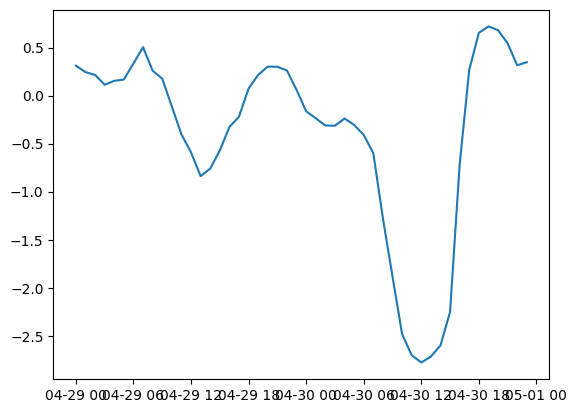

In [3]:
plt.plot(y_test.index, y_test)

Mean squared error: 1.8027691528777497e+24
Root mean squared error: 1342672392237.8645
Mean absolute error: 1340844683552.7302


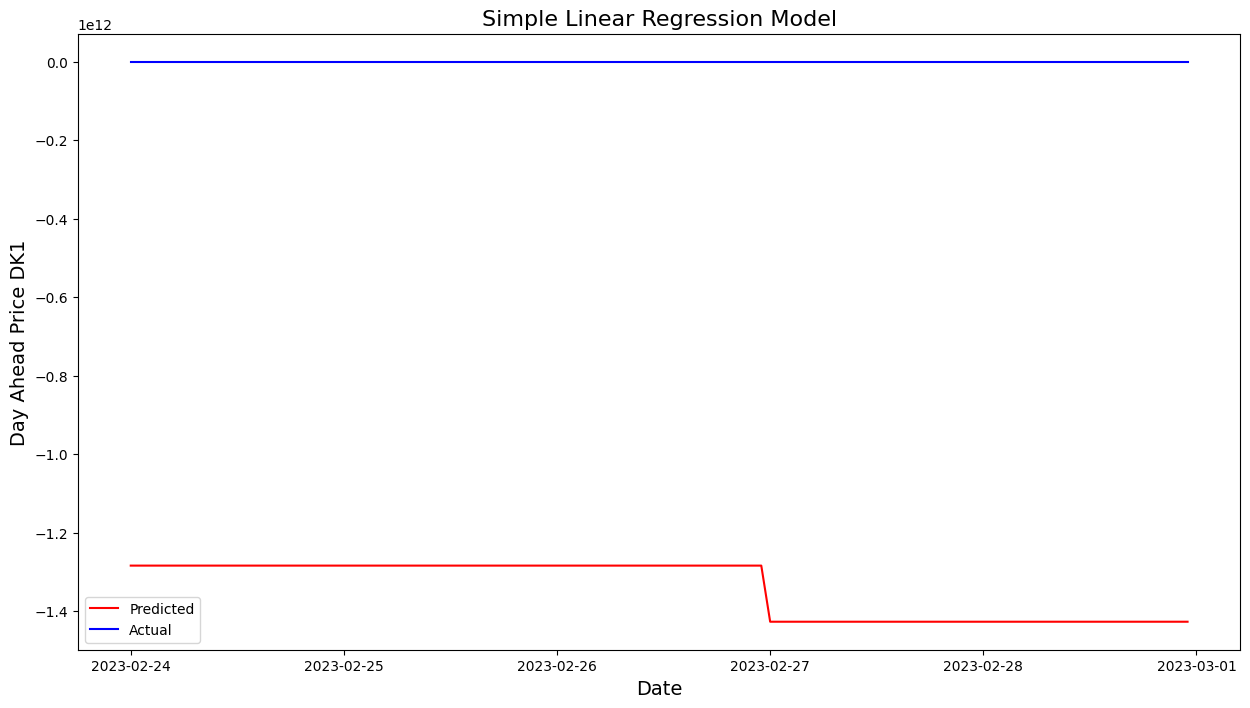

In [4]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean squared error: {mse}")
print(f"Root mean squared error: {rmse}")
print(f"Mean absolute error: {mae}")

plt.figure(figsize=(15, 8))

plt.plot(y_test.index, y_pred, label="Predicted", color="red")
plt.plot(y_test.index, y_test, label="Actual", color="blue")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Day Ahead Price DK1", fontsize=14)
plt.title("Simple Linear Regression Model", fontsize=16)
plt.legend()
plt.show()